# 12.4. Simulating a partial differential equation — reaction-diffusion systems and Turing patterns

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [56]:
size = 100  # size of the 2D grid
dx = 20 #. / size  # space step

In [57]:
T = 9.0  # total time
dt = .001  # time step
n = int(T / dt)  # number of iterations

sigma = 400 * np.eye(2)
mu = [50, 50]
scale = 100/0.03978873577297385

1.0


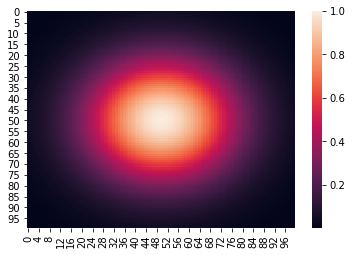

In [58]:

c = np.array([[scale * np.exp(-.5 * (np.array([i,j]) - mu).T @ (np.linalg.inv(sigma) @ (np.array([i,j]) - mu ))) / (np.sqrt((2 * np.pi)**2 * np.linalg.det(sigma))) for j in range(size)] for i in range(size)])
d = 16
print(np.max(c))
import seaborn as sns
sns.heatmap(c)
#U = np.random.rand(size, size)
#V = np.random.rand(size, size)

In [59]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

In [60]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

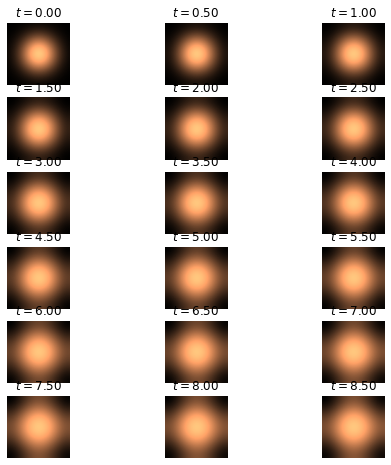

In [61]:
fig, axes = plt.subplots(6, 3, figsize=(8, 8))
step_plot = n // (2*int(T))
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaC = laplacian(c)
    
    c[1:-1,1:-1] = c[1:-1,1:-1] + d * deltaC
    
    #deltaU = laplacian(U)
    #deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    #Uc = U[1:-1, 1:-1]
    #Vc = V[1:-1, 1:-1]
    # We update the variables.
    
    #c[1:-1, 1:-1] = -2 * c_row + deltaC * 
    
    
    #U[1:-1, 1:-1], V[1:-1, 1:-1] = \
     #   Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
      #  Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    c[0] = c[1]
    c[-1] = c[-2]
    for Z in (c[1:-1, :]):
        Z[0] = Z[1]
        Z[-1] = Z[-2]


    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0:# and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(c, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

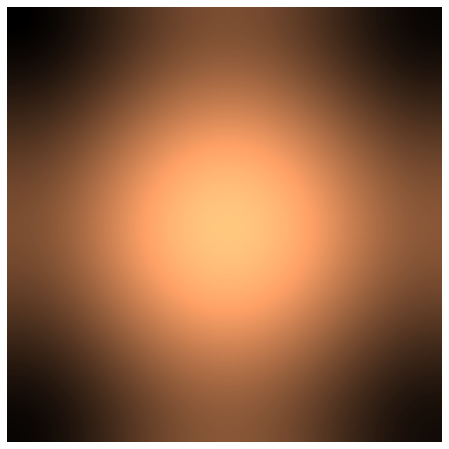

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
show_patterns(c, ax=ax)